In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
from matplotlib import pyplot as plt
import numpy as np
import pickle as pkl
import seaborn as sns
import copy

%matplotlib inline

In [2]:
df_for_mat = pd.read_pickle('./pkls/has_foreign_material.pkl')
df_homo = pd.read_pickle('./pkls/has_homogeneity.pkl')
df_moist = pd.read_pickle('./pkls/has_moisture.pkl')
df_water_act = pd.read_pickle('./pkls/has_water_activity.pkl')

In [7]:
print('foreign material', df_for_mat.shape)
print('homogeneity', df_homo.shape)
print('moisture', df_moist.shape)
print('water_activity', df_water_act.shape)

foreign material (6636, 14)
homogeneity (18, 14)
moisture (4862, 14)
water_activity (3053, 14)


In [96]:
def print_sample_of_original(df, test_name):
    sample = df.iloc[:1]["coa_data"][0][test_name][0]['results']
    print(pd.DataFrame.from_dict(sample, orient='index'))

In [26]:
def replace_all_columns(df, oldVals, newVal):
    for column in df.columns:
        df[column].replace(oldVals, newVal, inplace=True)

In [24]:
def drop_index(df):
    df = df.drop('index', axis=1)
    return df

In [22]:
def get_unique(df):
    for column in df:
        print(column, df[column].unique())

In [10]:
def check_data(df, test_name):
    
    for index, row in df.iterrows():

        # Check if type is list
        is_list = type(row['coa_data'][test_name]) is list

        # Look at length of results in list format
        if is_list:
            if (len(row['coa_data'][test_name]) > 1):
                print(len(row['coa_data'][test_name]))
                print(row['coa_data'][test_name][0]['results'])
                print(row['coa_data'][test_name][1]['results'])            

In [8]:
def extract_flat_results(df, test_name):
    df_results = pd.DataFrame()
    not_included = 0
    for index, row in df.iterrows():
        
        # Check if type is dictionary, both formats (lists and dicts) will appear
        is_dict = type(row['coa_data'][test_name]) is dict
        
        # Pull out test results
        results = row['coa_data'][test_name]['results'] if is_dict else row['coa_data'][test_name][0]['results']
        
        if (type(results) is not dict):
            not_included += 1
            continue
            
        # Create temporary df from each row of results to merge with other rows of data
        # Only keep entry 'amount'    
        temp_df = pd.DataFrame.from_dict(results)
        temp_df = temp_df[temp_df.index == 'amount'].reset_index()
        df_results = df_results.append(temp_df, ignore_index=True)
    
    print('not_included', not_included)
    print(df_results.shape)
    print(df_results.head()) 
    
    return df_results
        

In [9]:
df_foreign_material_results = extract_flat_results(df_for_mat, 'foreign_material_test')

not_included 2
(6634, 10)
    index Cinders Dirt Imbedded Foreign Material Insect Fragments  \
0  amount       0    0                         0                0   
1  amount       0    0                         0                0   
2  amount       0    0                         0                0   
3  amount       0    0                         0                0   
4  amount       0    0                         0                0   

  Mammal Excrement Mold Rodent Hair Sand Soil  
0                0    0           0    0    0  
1                0    0           0    0    0  
2                0    0           0    0    0  
3                0    0           0    0    0  
4                0    0           0    0    0  


In [11]:
check_data(df_for_mat, 'foreign_material_test')

In [23]:
get_unique(df_foreign_material_results)

index ['amount']
Cinders [0 '5']
Dirt [0 '5']
Imbedded Foreign Material [0 '5']
Insect Fragments [0 7 1 10 '5']
Mammal Excrement [0 '5']
Mold [0 26 '5']
Rodent Hair [0 '5']
Sand [0 '5']
Soil [0 '5']


In [25]:
df_foreign_material_results = drop_index(df_foreign_material_results)
df_foreign_material_results.describe()

,Cinders,Dirt,Imbedded Foreign Material,Insect Fragments,Mammal Excrement,Mold,Rodent Hair,Sand,Soil
count,6634,6634,6634,6634,6634,6634,6634,6634,6634
unique,2,2,2,5,2,3,2,2,2
top,0,0,0,0,0,0,0,0,0
freq,6633,6633,6633,6630,6633,6631,6633,6633,6633


In [27]:
replace_all_columns(df_foreign_material_results, ['5'], 5)

In [31]:
print(df_foreign_material_results.dtypes)
print(df_foreign_material_results.describe())

Cinders                      int64
Dirt                         int64
Imbedded Foreign Material    int64
Insect Fragments             int64
Mammal Excrement             int64
Mold                         int64
Rodent Hair                  int64
Sand                         int64
Soil                         int64
dtype: object
           Cinders         Dirt  Imbedded Foreign Material  Insect Fragments  \
count  6634.000000  6634.000000                6634.000000       6634.000000   
mean      0.000754     0.000754                   0.000754          0.003467   
std       0.061388     0.061388                   0.061388          0.162392   
min       0.000000     0.000000                   0.000000          0.000000   
25%       0.000000     0.000000                   0.000000          0.000000   
50%       0.000000     0.000000                   0.000000          0.000000   
75%       0.000000     0.000000                   0.000000          0.000000   
max       5.000000     5.000000

In [39]:
df_foreign_material_results = df_foreign_material_results.drop_duplicates()
df_foreign_material_results.describe()

,Cinders,Dirt,Imbedded Foreign Material,Insect Fragments,Mammal Excrement,Mold,Rodent Hair,Sand,Soil
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.833333,0.833333,0.833333,3.833333,0.833333,5.166667,0.833333,0.833333,0.833333
std,2.041241,2.041241,2.041241,4.167333,2.041241,10.400321,2.041241,2.041241,2.041241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,6.500000,0.000000,3.750000,0.000000,0.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,26.000000,5.000000,5.000000,5.000000


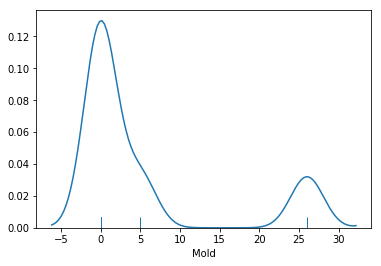

In [43]:
sns.distplot(df_foreign_material_results['Mold'], hist=False, rug=True);

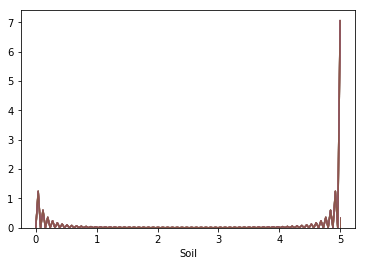

In [49]:
sns.distplot(df_foreign_material_results['Cinders'], hist=False, rug=True);
sns.distplot(df_foreign_material_results['Dirt'], hist=False, rug=True);
sns.distplot(df_foreign_material_results['Imbedded Foreign Material'], hist=False, rug=True);
sns.distplot(df_foreign_material_results['Rodent Hair'], hist=False, rug=True);
sns.distplot(df_foreign_material_results['Sand'], hist=False, rug=True);
sns.distplot(df_foreign_material_results['Soil'], hist=False, rug=True);

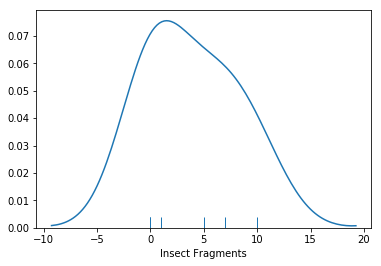

In [50]:
sns.distplot(df_foreign_material_results['Insect Fragments'], hist=False, rug=True);

<h5>Homogeneity Results</h5>

In [13]:
df_homogeneity_results = extract_flat_results(df_homo, 'homogeneity_test')

not_included 1
(17, 2)
    index THC RSD
0  amount       0
1  amount     9.1
2  amount    9.65
3  amount     5.9
4  amount    8.29


In [14]:
check_data(df_homo, 'homogeneity_test')

In [32]:
df_homogeneity_results = drop_index(df_homogeneity_results)

In [37]:
print(df_homogeneity_results.dtypes)
print(df_homogeneity_results.describe())
print(df_homogeneity_results['THC RSD'].unique())

THC RSD    float64
dtype: object
         THC RSD
count  17.000000
mean    6.691176
std     4.485542
min     0.000000
25%     3.460000
50%     5.900000
75%     9.520000
max    18.070000
[  0.     9.1    9.65   5.9    8.29   3.46   1.32   2.81   6.1   18.07
   4.33   4.04  10.56   3.33  11.86   5.41   9.52]


In [36]:
df_homogeneity_results = df_homogeneity_results.astype('float64')

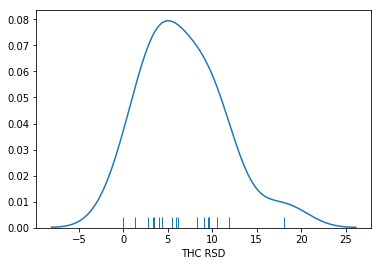

In [38]:
sns.distplot(df_homogeneity_results['THC RSD'], hist=False, rug=True);

<h5>Moisture Test</h5>

In [15]:
df_moisture_results = extract_flat_results(df_moist, 'moisture_test')

not_included 3
(4859, 2)
    index Moisture
0  amount      6.1
1  amount      7.6
2  amount        9
3  amount      6.8
4  amount      6.6


In [16]:
check_data(df_moist, 'moisture_test')

In [51]:
df_moisture_results = drop_index(df_moisture_results)

In [53]:
df_moisture_results = df_moisture_results.astype('float64')
df_moisture_results.describe()

,Moisture
count,4859.000000
mean,7.585451
std,3.929382
min,0.000000
25%,6.500000
50%,7.300000
75%,8.000000
max,76.500000


In [59]:
df_moisture_results.drop_duplicates().describe()

,Moisture
count,155.000000
mean,16.060045
std,18.788645
min,0.000000
25%,4.850000
50%,8.600000
75%,16.900000
max,76.500000


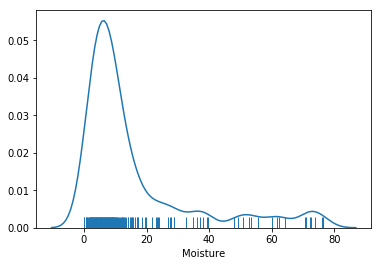

In [60]:
sns.distplot(df_moisture_results.drop_duplicates().Moisture, hist=False, rug=True);

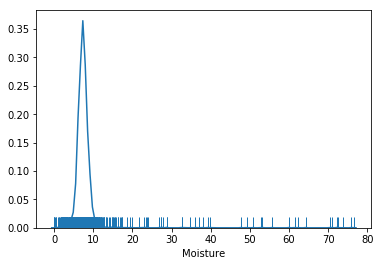

In [58]:
sns.distplot(df_moisture_results['Moisture'], hist=False, rug=True);

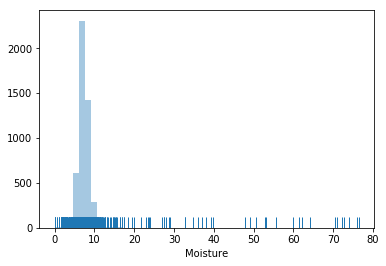

In [55]:
sns.distplot(df_moisture_results['Moisture'], kde=False, rug=True);

<h5>Water Activity</h5>

In [17]:
df_water_activity = extract_flat_results(df_water_act, 'water_activity_test')

not_included 3
(3050, 2)
    index Water Activity
0  amount            0.5
1  amount           0.59
2  amount           0.58
3  amount           0.53
4  amount           0.54


In [18]:
check_data(df_water_act, 'water_activity_test')

2
[{'analyte': 'Water Activity', 'units': 'Aw', 'amount': 0}]
[{'analyte': 'Water Activity', 'units': 'Aw', 'amount': 0}]


In [61]:
df_water_activity = drop_index(df_water_activity)
print(df_water_activity.dtypes)

Water Activity    object
dtype: object


In [62]:
df_water_activity = df_water_activity.astype('float64')

In [65]:
df_water_activity['Water Activity'].unique()

array([ 0.5  ,  0.59 ,  0.58 ,  0.53 ,  0.54 ,  0.56 ,  0.52 ,  0.63 ,
        0.46 ,  0.47 ,  0.51 ,  0.57 ,  0.49 ,  0.42 ,  0.44 ,  0.45 ,
        0.37 ,  0.61 ,  0.67 ,  0.55 ,  0.16 ,  0.64 ,  0.66 ,  0.   ,
        0.41 ,  0.65 ,  0.48 ,  0.39 ,  0.43 ,  0.62 ,  0.38 ,  0.26 ,
        0.6  ,  0.68 ,  0.4  ,  0.73 ,  0.22 ,  0.3  ,  0.27 ,  0.7  ,
        0.33 ,  0.36 ,  0.34 ,  0.76 ,  0.32 ,  0.35 ,  0.72 ,  0.69 ,
        0.11 ,  0.78 ,  0.2  ,  0.278,  0.75 ,  0.74 ,  0.14 ,  0.08 ,
        0.1  ,  0.06 ,  0.15 ,  0.09 ,  0.07 ,  0.04 ,  0.79 ,  0.23 ,
        0.71 ,  0.77 ,  0.82 ,  0.83 ,  0.17 ,  0.8  ,  0.81 ,  0.13 ,
        0.18 ])

In [66]:
df_water_activity.describe()

,Water Activity
count,3050.000000
mean,0.545612
std,0.083444
min,0.000000
25%,0.510000
50%,0.550000
75%,0.590000
max,0.830000


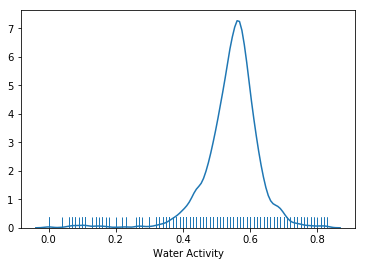

In [64]:
sns.distplot(df_water_activity['Water Activity'], hist=False, rug=True, kde=True);

In [67]:
df_water_activity.drop_duplicates().describe()

,Water Activity
count,73.000000
mean,0.453945
std,0.234599
min,0.000000
25%,0.270000
50%,0.470000
75%,0.650000
max,0.830000


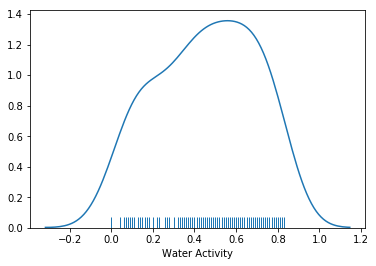

In [68]:
sns.distplot(df_water_activity.drop_duplicates()['Water Activity'], hist=False, rug=True);

In [97]:
print_sample_of_original(df_for_mat, 'foreign_material_test')

                                             analyte  passed  units  amount  \
Cinders                                      Cinders    True      %       0   
Dirt                                            Dirt    True      %       0   
Imbedded Foreign Material  Imbedded Foreign Material    True      %       0   
Insect Fragments                    Insect Fragments    True  Units       0   
Mammal Excrement                    Mammal Excrement    True  Units       0   
Mold                                            Mold    True      %       0   
Rodent Hair                              Rodent Hair    True  Units       0   
Sand                                            Sand    True      %       0   
Soil                                            Soil    True      %       0   

                          detection_limits  
Cinders                               None  
Dirt                                  None  
Imbedded Foreign Material             None  
Insect Fragments             